## WTP Sample geosmin data model development

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mb

In [2]:
#water treatment plant samples
wtp_samples_geosmin = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/wtp_samples_geosmin1.csv')

wtp_samples_geosmin = wtp_samples_geosmin.drop(columns = ['SAMPLE_NUMBER','SAMPLING_POINT_DESCRIPTION','SITE','ANALYTE','Time','FACILITY','SAMPLED_DATE','DEPTH'])

#split sample_res_geosmin into three different dataframes based on the target differentiation
wtp_samples_geosmin_MLOWH = wtp_samples_geosmin[wtp_samples_geosmin['Target'] == 'MLOWH']
wtp_samples_geosmin_MLOWM = wtp_samples_geosmin[wtp_samples_geosmin['Target'] == 'MLOWM']
wtp_samples_geosmin_MLOWL = wtp_samples_geosmin[wtp_samples_geosmin['Target'] == 'MLOWL']

In [3]:
wtp_samples_geosmin_MLOWM

,SAMPLE_NAME,FORMATTED_ENTRY,UNITS,Target,Date
0,PL-MAR-MLOWM,8.0,ng/L,MLOWM,7/28/2020
1,PL-MAR-MLOWM,29.0,ng/L,MLOWM,7/31/2020
2,PL-MAR-MLOWM,19.0,ng/L,MLOWM,8/4/2020
3,PL-MAR-MLOWM,37.0,ng/L,MLOWM,8/7/2020
4,PL-MAR-MLOWM,12.0,ng/L,MLOWM,8/11/2020
...,...,...,...,...,...
119,PL-MAR-MLOWM,2.0,ng/L,MLOWM,5/24/2022
120,PL-MAR-MLOWM-A-4,3.0,ng/L,MLOWM,5/26/2022
121,PL-MAR-MLOWM,3.0,ng/L,MLOWM,5/31/2022
122,PL-MAR-MLOWM-A-4,3.0,ng/L,MLOWM,6/2/2022


#### Import the following dataframes that were compiled previously:
1. df_final_wo_nut - this is the datafile with the following categories: 
'Waterton Gage (cfs)',
 'Temp Ch, C (high) ',
 'South Platte Above Cheesman Flowrate (cfs)',
 'South Platte Below Cheesman Downstream (cfs) ',
 'Roberts Tunnel Flowrate (cfs)',
 'Strontia Springs Temperature, high (C)',
 'Conduit 20 to Marston Total (No Chatfield water) ',
 'Conduit 20 (with Chatfield flow) (cfs)',
 'Marston WTP Outflow (cfs)',
 'Strontia Springs Outflow (cfs)',
 'Marston Temperature, high (C)'.

 2. df_full - this is the nutrient concentration from 10/3/2019 to 6/30/2022 that will be added to df_final_wo_nut to make df_final_w_nut.
 Has the following categories: 'Adjusted TOC, MS above Conf.',
 'Adjusted TP, MS above Conf.',
 'Adjusted turbidity, MS above Conf.',
 'Adjusted TOC, NF Above Conf.',
 'Adjusted TP, NF Above Conf.',
 'Adjusted turbidity, NF Above Conf.',
 'Adjusted TOC, Downstream Strontia',
 'Adjusted TP, Downstream Strontia',
 'Adjusted turbidity, Downstream Strontia',
 'Adjusted TOC, Upstream Strontia',
 'Adjusted TP, Upstream Strontia',
 'Adjusted turbidity, Upstream Strontia',
 'Adjusted TOC, SP Below Chatfield',
 'Adjusted TP, SP Below Chatfield',
 'Adjusted turbidity, SP Below Chatfield'.

 3. a split dataframe between different targets

#### Note that due to the small number of MLOWL and MLOWH entries (3 each), we will eliminate them from the OLS model but will still look at them in the visual analysis done in later sections. 

In [4]:
df_final_wo_nut = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/df_final_wo_nut.csv')
df_full = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/df_full.csv')

df_final_wo_nut = df_final_wo_nut.drop(columns = ['Unnamed: 0'])
df_full = df_full.drop(columns = ['Unnamed: 0'])


#reset index and set new index to "date" for both major dataframes
df_final_wo_nut.reset_index(drop=True, inplace=True)
df_final_wo_nut = df_final_wo_nut.set_index(["Date"])

df_full.reset_index(drop=True, inplace=True)
df_full = df_full.set_index(["Date"])

wtp_samples_geosmin_MLOWM.reset_index(drop=True, inplace=True)
#wtp_samples_geosmin_MLOWM = wtp_samples_geosmin_MLOWM.rename(columns = {'Date ':'Date'})
wtp_samples_geosmin_MLOWM = wtp_samples_geosmin_MLOWM.set_index(['Date'])


#merge between sample reservoir geosmin concentration values and dataframe without nutrient concentrations to only get values from dates
result_wo_nut_MLOWM = pd.merge(df_final_wo_nut, wtp_samples_geosmin_MLOWM, on = "Date")


In [5]:
df_final_wo_nut

,Waterton Gage (cfs),"Temp Ch, C (high)",South Platte Above Cheesman Flowrate (cfs),South Platte Below Cheesman Downstream (cfs),Roberts Tunnel Flowrate (cfs),"Strontia Springs Temperature, high (C)",Conduit 20 to Marston Total (No Chatfield water),Conduit 20 (with Chatfield flow) (cfs),Marston WTP Outflow (cfs),Strontia Springs Outflow (cfs),"Marston Temperature, high (C)"
Date,,,,,,,,,,,
6/1/2012,0.276317,27.8,4.828314,5.416100,263.250000,26.111111,6.624953,7.993122,9.047652,4.574711,22.777778
6/2/2012,0.275352,27.8,4.812184,5.416100,263.250000,26.666667,6.624953,7.993122,9.047652,4.574711,27.222222
6/3/2012,0.276317,31.1,4.795791,5.416100,263.250000,28.888889,6.759438,8.104937,9.047652,4.564869,23.888889
6/4/2012,0.280316,32.2,4.828314,5.416100,247.100000,28.888889,6.559726,7.939144,9.047652,4.563410,31.111111
6/5/2012,0.280522,28.3,4.867534,5.416100,218.679167,27.777778,6.613622,7.983733,9.047652,4.566221,31.666667
...,...,...,...,...,...,...,...,...,...,...,...
6/26/2022,0.177439,19.4,4.736198,4.351567,329.666700,28.333333,10.614613,10.614613,8.468176,5.686975,18.333333
6/27/2022,0.185367,30.6,4.955827,4.346399,382.708300,31.666667,9.313968,9.313968,8.147392,5.497168,18.333333
6/28/2022,0.187791,33.9,5.081404,4.342506,390.750000,31.111111,9.041018,9.041018,8.850424,5.459586,28.888889


In [6]:
result_wo_nut_MLOWM

,Waterton Gage (cfs),"Temp Ch, C (high)",South Platte Above Cheesman Flowrate (cfs),South Platte Below Cheesman Downstream (cfs),Roberts Tunnel Flowrate (cfs),"Strontia Springs Temperature, high (C)",Conduit 20 to Marston Total (No Chatfield water),Conduit 20 (with Chatfield flow) (cfs),Marston WTP Outflow (cfs),Strontia Springs Outflow (cfs),"Marston Temperature, high (C)",SAMPLE_NAME,FORMATTED_ENTRY,UNITS,Target
Date,,,,,,,,,,,,,,,
7/28/2020,0.243927,28.9,5.872118,4.523960,220.104167,27.777778,12.310565,12.310565,10.543244,5.420535,29.444444,PL-MAR-MLOWM,8.0,ng/L,MLOWM
7/31/2020,0.203879,30.0,5.874931,5.214936,314.233333,28.888889,10.605659,10.605659,9.657639,5.424950,26.111111,PL-MAR-MLOWM,29.0,ng/L,MLOWM
8/4/2020,0.176137,30.6,5.945421,5.703782,363.910417,29.444444,12.116930,12.116930,11.331372,5.802118,29.444444,PL-MAR-MLOWM,19.0,ng/L,MLOWM
8/7/2020,0.162744,35.0,5.902633,5.872118,362.762500,33.333333,12.119406,12.119406,10.004499,5.973810,30.555556,PL-MAR-MLOWM,37.0,ng/L,MLOWM
8/11/2020,0.193512,33.9,5.894403,5.913503,306.791667,33.888889,12.099174,12.099174,9.735502,5.533389,30.000000,PL-MAR-MLOWM,12.0,ng/L,MLOWM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5/24/2022,0.248839,13.3,5.736572,5.043425,221.833300,12.222222,8.080223,8.080223,7.174956,4.867534,14.444444,PL-MAR-MLOWM,2.0,ng/L,MLOWM
5/26/2022,0.244520,27.8,5.802118,4.897840,172.475000,26.666667,8.083316,8.083316,7.105632,4.969813,20.000000,PL-MAR-MLOWM-A-4,3.0,ng/L,MLOWM
5/31/2022,0.206843,15.6,5.455321,4.596129,82.525000,15.000000,8.088881,8.088881,7.118286,5.187386,18.888889,PL-MAR-MLOWM,3.0,ng/L,MLOWM


/opt/anaconda3/envs/gds/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


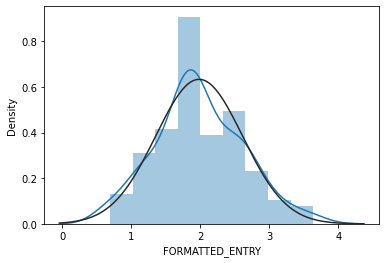

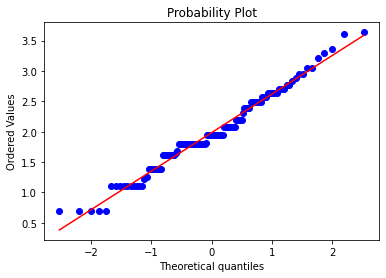

In [7]:
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import math

sns.distplot(np.log(result_wo_nut_MLOWM['FORMATTED_ENTRY']), fit=norm);
fig = plt.figure()
res = stats.probplot(np.log(result_wo_nut_MLOWM['FORMATTED_ENTRY']), plot=plt)

In [8]:
result_wo_nut_MLOWM['FORMATTED_ENTRY'] = np.log(result_wo_nut_MLOWM['FORMATTED_ENTRY'])

#initial scaling
df_full['Adjusted TP, MS above Conf.'] = df_full['Adjusted TP, MS above Conf.'] + 1
df_full['Adjusted turbidity, MS above Conf.'] = df_full['Adjusted turbidity, MS above Conf.'] + 1
df_full['Adjusted TP, NF Above Conf.'] = df_full['Adjusted TP, NF Above Conf.'] + 1
df_full['Adjusted turbidity, NF Above Conf.'] = df_full['Adjusted turbidity, NF Above Conf.'] + 1.5
df_full['Adjusted TP, Downstream Strontia'] = df_full['Adjusted TP, Downstream Strontia'] + 1
df_full['Adjusted turbidity, Downstream Strontia'] = df_full['Adjusted turbidity, Downstream Strontia'] + 1.437
df_full['Adjusted TP, Upstream Strontia'] = df_full['Adjusted TP, Upstream Strontia'] + 1
df_full['Adjusted turbidity, Upstream Strontia'] = df_full['Adjusted turbidity, Upstream Strontia'] + 1
df_full['Adjusted TP, SP Below Chatfield'] = df_full['Adjusted TP, SP Below Chatfield'] + 1
df_full['Adjusted turbidity, SP Below Chatfield'] = df_full['Adjusted turbidity, SP Below Chatfield'] + 2.5

#transformations based on previous analysis
df_full['Adjusted TOC, MS above Conf.'] = np.log(df_full['Adjusted TOC, MS above Conf.'])
df_full['Adjusted TP, MS above Conf.'] = np.log(df_full['Adjusted TP, MS above Conf.'])
df_full['Adjusted turbidity, MS above Conf.'] = np.sqrt(df_full['Adjusted turbidity, MS above Conf.'])

df_full['Adjusted TOC, NF Above Conf.'] = np.log(df_full['Adjusted TOC, NF Above Conf.'])
df_full['Adjusted TP, NF Above Conf.'] = np.log(df_full['Adjusted TP, NF Above Conf.'])
df_full['Adjusted turbidity, NF Above Conf.'] = np.log(df_full['Adjusted turbidity, NF Above Conf.'])

df_full['Adjusted TOC, Downstream Strontia'] = np.log(df_full['Adjusted TOC, Downstream Strontia'])
df_full['Adjusted TP, Downstream Strontia'] = np.sqrt(df_full['Adjusted TP, Downstream Strontia'])
df_full['Adjusted turbidity, Downstream Strontia'] = np.log(df_full['Adjusted turbidity, Downstream Strontia'])

df_full['Adjusted TOC, Upstream Strontia'] = np.sqrt(df_full['Adjusted TOC, Upstream Strontia'])
df_full['Adjusted TP, Upstream Strontia'] = np.log(df_full['Adjusted TP, Upstream Strontia'])
df_full['Adjusted turbidity, Upstream Strontia'] = np.sqrt(df_full['Adjusted turbidity, Upstream Strontia'])

df_full['Adjusted TOC, SP Below Chatfield'] = np.sqrt(df_full['Adjusted TOC, SP Below Chatfield'])
# dropping Adjusted TP below chatfield - transformation not really possible 
df_full['Adjusted turbidity, SP Below Chatfield'] = np.log(df_full['Adjusted turbidity, SP Below Chatfield'])

In [9]:
x_names = result_wo_nut_MLOWM.columns.values.tolist()

In [10]:
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

x_vals_wo_nut = result_wo_nut_MLOWM[[
'Waterton Gage (cfs)',
 'Temp Ch, C (high) ',
 'South Platte Above Cheesman Flowrate (cfs)',
 'South Platte Below Cheesman Downstream (cfs) ',
 'Roberts Tunnel Flowrate (cfs)',
 'Strontia Springs Temperature, high (C)',
 'Conduit 20 to Marston Total (No Chatfield water) ',
 'Conduit 20 (with Chatfield flow) (cfs)',
 'Marston WTP Outflow (cfs)',
 'Strontia Springs Outflow (cfs)',
 'Marston Temperature, high (C)'
 ]]

x_vals_wo_nut = StandardScaler().fit_transform(x_vals_wo_nut)
y_vals_wo_nut = result_wo_nut_MLOWM[['FORMATTED_ENTRY']]

#with sklearn
regr = linear_model.LinearRegression()
regr.fit(x_vals_wo_nut, y_vals_wo_nut)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x_vals_wo_nut) # adding a constant
 
model = sm.OLS(y_vals_wo_nut, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [1.98449254]
Coefficients: 
 [[ 0.14034324 -0.17216811 -0.21220043  0.03112303  0.01274668  0.20094675
  -0.9233407   0.85647568  0.05836371  0.39351976  0.06604476]]
                            OLS Regression Results                            
Dep. Variable:        FORMATTED_ENTRY   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     2.375
Date:                Thu, 22 Dec 2022   Prob (F-statistic):             0.0115
Time:                        12:42:31   Log-Likelihood:                -99.992
No. Observations:                 118   AIC:                             224.0
Df Residuals:                     106   BIC:                             257.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std e

In [11]:
#make a copy of df_final_wo_nut as (with) nutrient concentration

df_final_w_nut = df_final_wo_nut.copy()

df_full_val_w_nut = pd.merge(df_final_w_nut, df_full, on= "Date")
result_w_nut_wtp_sam = pd.merge(df_full_val_w_nut, wtp_samples_geosmin_MLOWM, on= "Date")

In [12]:
x_names_w_nut = result_w_nut_wtp_sam.columns.values.tolist()

In [13]:
#new OLS with nutrient concentrations 

from sklearn import linear_model
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

x_vals_w_nut = result_w_nut_wtp_sam[[
'Waterton Gage (cfs)',
 'Temp Ch, C (high) ',
 'South Platte Above Cheesman Flowrate (cfs)',
 'South Platte Below Cheesman Downstream (cfs) ',
 'Roberts Tunnel Flowrate (cfs)',
 'Strontia Springs Temperature, high (C)',
 'Conduit 20 to Marston Total (No Chatfield water) ',
 'Conduit 20 (with Chatfield flow) (cfs)',
 'Marston WTP Outflow (cfs)',
 'Strontia Springs Outflow (cfs)',
 'Marston Temperature, high (C)',
 'Adjusted TOC, MS above Conf.',
 'Adjusted TP, MS above Conf.',
 'Adjusted turbidity, MS above Conf.',
 'Adjusted TOC, NF Above Conf.',
 'Adjusted TP, NF Above Conf.',
 'Adjusted turbidity, NF Above Conf.',
 'Adjusted TOC, Downstream Strontia',
 'Adjusted TP, Downstream Strontia',
 'Adjusted turbidity, Downstream Strontia',
 'Adjusted TOC, Upstream Strontia',
 'Adjusted TP, Upstream Strontia',
 'Adjusted turbidity, Upstream Strontia',
 'Adjusted TOC, SP Below Chatfield',
 'Adjusted TP, SP Below Chatfield',
 'Adjusted turbidity, SP Below Chatfield'
 ]]

x_vals_w_nut = StandardScaler().fit_transform(x_vals_w_nut)
y_vals_w_nut = result_w_nut_wtp_sam[['FORMATTED_ENTRY']]

#with sklearn
regr = linear_model.LinearRegression()
regr.fit(x_vals_w_nut, y_vals_w_nut)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x_w_nut = sm.add_constant(x_vals_w_nut) # adding a constant
 
model = sm.OLS(y_vals_w_nut, x_w_nut).fit()
predictions = model.predict(x_w_nut) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [8.93745763]
Coefficients: 
 [[ -0.37807201  -2.251558    -1.76131649   2.09286105   1.34394745
    2.55292246   7.25301556  -5.58204142  -2.3036376    1.41373055
    1.32029402   3.31146283  15.36393006   2.68361289   9.40640196
   -5.58455509  -5.79467938   0.82842697  -0.84264923  -0.09912667
    1.92090807 -13.18595393  -3.77122423   5.97294333  -5.73710575
    0.05204946]]
                            OLS Regression Results                            
Dep. Variable:        FORMATTED_ENTRY   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     3.764
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           1.45e-06
Time:                        12:42:31   Log-Likelihood:                -344.72
No. Observations:                 118   AIC:                             743.4
Df Residuals:                      91   BIC:         

### Step 8: Regional model influence - use the larger model with nutrient information

#### Region 1: Cheesman Reservoir area

In [14]:
x_vals_w_nut_ch = result_w_nut_wtp_sam[[
'South Platte Above Cheesman Flowrate (cfs)',
'South Platte Below Cheesman Downstream (cfs) ',  
'Adjusted TOC, MS above Conf.',
'Adjusted TP, MS above Conf.',
'Adjusted turbidity, MS above Conf.',
]]

x_vals_w_nut_ch = StandardScaler().fit_transform(x_vals_w_nut_ch)
y_vals_w_nut_ch = result_w_nut_wtp_sam[['FORMATTED_ENTRY']]

#with sklearn
regr = linear_model.LinearRegression()
regr.fit(x_vals_w_nut_ch, y_vals_w_nut_ch)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x_w_nut_ch = sm.add_constant(x_vals_w_nut_ch) # adding a constant
 
model = sm.OLS(y_vals_w_nut_ch, x_w_nut_ch).fit()
predictions = model.predict(x_w_nut_ch) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [8.93745763]
Coefficients: 
 [[ 0.90715781  1.67416148  0.44960231 -1.11680838 -0.88816116]]
                            OLS Regression Results                            
Dep. Variable:        FORMATTED_ENTRY   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     2.583
Date:                Thu, 22 Dec 2022   Prob (F-statistic):             0.0299
Time:                        13:47:29   Log-Likelihood:                -381.36
No. Observations:                 118   AIC:                             774.7
Df Residuals:                     112   BIC:                             791.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

#### Region 2: Roberts Tunnel area

In [15]:
x_vals_w_nut_rt = result_w_nut_wtp_sam[[
'Roberts Tunnel Flowrate (cfs)',
'Adjusted TOC, NF Above Conf.',
'Adjusted TP, NF Above Conf.',
'Adjusted turbidity, NF Above Conf.',
]]

x_vals_w_nut_rt = StandardScaler().fit_transform(x_vals_w_nut_rt)
y_vals_w_nut_rt = result_w_nut_wtp_sam[['FORMATTED_ENTRY']]

#with sklearn
regr = linear_model.LinearRegression()
regr.fit(x_vals_w_nut_rt, y_vals_w_nut_rt)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x_w_nut_rt = sm.add_constant(x_vals_w_nut_rt) # adding a constant
 
model = sm.OLS(y_vals_w_nut_rt, x_w_nut_rt).fit()
predictions = model.predict(x_w_nut_rt) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [8.93745763]
Coefficients: 
 [[ 1.79406259  3.31558443  0.92798653 -3.31891512]]
                            OLS Regression Results                            
Dep. Variable:        FORMATTED_ENTRY   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     7.597
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           1.86e-05
Time:                        13:47:33   Log-Likelihood:                -373.75
No. Observations:                 118   AIC:                             757.5
Df Residuals:                     113   BIC:                             771.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

#### Region 3: Strontia Springs area

In [16]:
x_vals_w_nut_ss = result_w_nut_wtp_sam[[
'Strontia Springs Temperature, high (C)',
'Strontia Springs Outflow (cfs)',
'Conduit 20 to Marston Total (No Chatfield water) ',
'Conduit 20 (with Chatfield flow) (cfs)',
'Adjusted TOC, Downstream Strontia',
'Adjusted TP, Downstream Strontia',
'Adjusted turbidity, Downstream Strontia',
'Adjusted TOC, Upstream Strontia',
'Adjusted TP, Upstream Strontia',
'Adjusted turbidity, Upstream Strontia',
]]

x_vals_w_nut_ss = StandardScaler().fit_transform(x_vals_w_nut_ss)
y_vals_w_nut_ss = result_w_nut_wtp_sam[['FORMATTED_ENTRY']]

#with sklearn
regr = linear_model.LinearRegression()
regr.fit(x_vals_w_nut_ss, y_vals_w_nut_ss)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x_w_nut_ss = sm.add_constant(x_vals_w_nut_ss) # adding a constant
 
model = sm.OLS(y_vals_w_nut_ss, x_w_nut_ss).fit()
predictions = model.predict(x_w_nut_ss) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [8.93745763]
Coefficients: 
 [[  0.50493235   3.6008151   14.79428919 -14.95265723  -0.22200742
    0.10644      0.91663369   1.65222099  -2.62963636  -3.88365964]]
                            OLS Regression Results                            
Dep. Variable:        FORMATTED_ENTRY   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     5.155
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           3.91e-06
Time:                        13:47:37   Log-Likelihood:                -364.60
No. Observations:                 118   AIC:                             751.2
Df Residuals:                     107   BIC:                             781.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err